In [1]:
import numpy as np
import hashlib

r_0 = None
def get_r_0(pref1='FISI',pref2='2028'):
    '''
        Funcion para determinar r_0 usando un algoritmo de hash
    '''
    global r_0
    def get_codigo():
        while True:
            try:
                c = int(input("Ingrese su código de estudiante"))       
            except ValueError:
                print("El código debe ser un entero")
                continue
            else:
                if c < 300000000 and c > 190000000:
                    return c
                else:
                    print("El código no parece ser válido. Intente nuevamente")
    def hasher(key, n):
        # sum ASCII values and convert string to integer
        lst = [ord(char) for char in list(key)]
        return np.sum(lst) % n
    codigo = get_codigo()
    key1 = hashlib.sha256((pref1+str(codigo)).encode('utf-8'))
    key2 = hashlib.sha256((pref2+str(codigo)).encode('utf-8'))
    r_0 = np.array([
        hasher(key1.hexdigest(),100)/10+26,
        hasher(key2.hexdigest(),400)/10-20,
        0
    ])
    print("Posición inicial r_0=(x=%.1fm,y=%.1fm,z=%.1fm)"%(r_0[0],r_0[1],r_0[2]))
get_r_0()

Ingrese su código de estudiante 200810693


Posición inicial r_0=(x=30.6m,y=-18.9m,z=0.0m)


# Tarea: la pelota de fútbol (Problema 1)
<!-- * [Drag y Magnus 1](https://www.researchgate.net/publication/228375759_Soccer_ball_lift_coefficients_via_trajectory_analysis)
* [Drag y Magnus 2](http://farside.ph.utexas.edu/teaching/329/lectures/node42.html)
* [Drag y Magnus 3](http://fse.studenttheses.ub.rug.nl/16434/1/Bsc_appliedMath_2017_Scholte_SIO.pdf)
* [Drag y Magnus 4](http://www.physics.usyd.edu.au/~cross/TRAJECTORIES/Sports%20Balls.pdf)
 -->
El siguiente es un problema inspirado en el [famoso tiro libre de Roberto Carlos en el partido Francia vs. Brasil](https://youtu.be/XdL7EDKr_rk). El objetivo es anotar un gol, así que por favor vea la cancha y sus dimensiones:
![Camp Nou](soccer.png)

$$\vec{r}=(52.5m,3.66m,2.44m)$$
$$\vec{r}_0=(30.6m,-18.9m,0.0m)$$
$$\vec{r}_{||}=(r-r_0)_{\perp\hat{k}}=(21.9m,22.56m,0.0m)$$

Computacionalmente:
$$\vec{X}=(x,y,z,v_x,v_y,v_z)$$
```python
X=np.array([x,y,z,vx,vy,vz])
```

$$f(\vec{X})=\dot{\vec{X}}=(v_x,v_y,v_z,0,0,-g)$$

Para determinar la posición desde la cual va a realizar el lanzamiento ejecute el siguiente código `get_r_0()`; cada uno de ustedes tendrá una posición única inicial de lanzamiento. <u>El fragmento del encabezado no debe modificarlo ya que será usado para verificar los resultados</u>. Para entender mejor como funcionan los algoritmos de máscara o *hashing* por favor sigan al siguiente artículo de [David Ziganto](https://dziganto.github.io/computer%20science/data%20science/hashing/machine%20learning/python/Introduction-to-Hashing/).

Teniendo en cuenta las siguientes características del balón, y las consideraciones de la cancha, determine la dirección y velocidad del lanzamiento para anotar un gol:
* Asuma que el balón no se deforma en ningún momento de la trayectoria
* $m=450$ gramos
* $v_\text{max}=183$ kmph
* El radio de un balón es aproximadamente $r\simeq11$ cm
* La barrera se ajusta con los extremos de la cancha y tiene una altura aproximada de $1.80$ cm. Eso quiere decir que el balón tiene que pasar por encima de la barrera.
* La fricción del aire, contraria a la dirección de <u>desplazamiento</u>, es $f_\text{aire}=\frac{1}{2}\rho A C_D(v)v^2$ siendo $v=|\vec{v}|$ la rapidez y $C_D(v)$ el coeficiente de arrastre que depende de la rapidez debido al flujo del aire alrededor del balón. Revisar la ecuación (3) del [artículo](https://www.researchgate.net/publication/228375759_Soccer_ball_lift_coefficients_via_trajectory_analysis) para implementarlo en el código.
* Recomiendo usar RungeKutta4 para resolver este problema. Ud. deberá hacer varios pasos

## Bono: implementar al igual que la fuerza de arrastre, la fuerza de Magnus

La fuerza de Magnus es uno de los efectos más interesantes de los fluidos con un gran número de aplicaciones, incluso en lugares insospechados. Los invito a ver el siguiente [video](https://youtu.be/HvXDVapHUkQ). Otras aplicaciones están en el campo de lo deportivo. Determine la magnitud y dirección de la velocidad lineal y angular para anotar un gol dadas las siguientes consideraciones adicionales:

* El momento de inercia de un eje que pasa por el centro es aproximadamente $I_0\simeq\frac{2}{3}m r^2$
* El coeficiente de empuje para la fuerza de Magnus depende de la velocidad angular y vá en la dirección $\omega\times\vec{v}$: ¿Cómo depende?
* Para determinar la rapidez y la velocidad angular escoja la cota superior de energía cinética total. Es decir, $v^2+(I_0/m)\omega^2\leq v_\text{max}^{2}$

In [2]:
g = 9.8 # m/s^2
m_balon = 0.45 # kg
r_balon = 0.11 # m
A_balon = np.pi*r_balon*r_balon # área transversal
rho_aire = 1.2 # kg/m^3
print("Valores:")
print("\tg=%.2f m/s²"%g)
print("\tm_balon=%.2f kg"%m_balon)
print("\tr_balon=%.2f m"%r_balon)
print("\tA_balon=%.2f m²"%A_balon)
print("\trho_aire=%.2f kg/m³"%rho_aire)

Valores:
	g=9.80 m/s²
	m_balon=0.45 kg
	r_balon=0.11 m
	A_balon=0.04 m²
	rho_aire=1.20 kg/m³


Debemos validar,
$$1+\frac{2}{3}\{S_{f}^{(0)}\}^{2}\leq \left[\frac{v_\text{max}}{v_{0}}\right]^{2},$$
con $S_{f}^{(0)}=r\omega_{0}/v_0$ la razón entre velocidad tangencial y velocidad angular ($r\omega$)

In [3]:
# condiciones iniciales: posicion
r=np.array([52.5,-3.66,0]) # m
r_paralelo = (r-r_0)/np.linalg.norm(r-r_0)
# condiciones iniciales: velocidad
phi0 = np.arctan2(r_paralelo[1],r_paralelo[0]); theta0 = 70*(np.pi/180);
v_0 = 90 * np.array([np.sin(theta0)*np.cos(phi0),np.sin(theta0)*np.sin(phi0),np.cos(theta0)]) / 3.6 # kmph -> m/s
# condiciones iniciales: velocidad angular
phi1 = np.arctan2(r_paralelo[1],r_paralelo[0])+np.pi; theta1 = 30*(np.pi/180);
S_f = 0.15
omega_0 = (S_f*np.linalg.norm(v_0)/r_balon)*np.array([np.sin(theta1)*np.cos(phi1),np.sin(theta1)*np.sin(phi1),np.cos(theta1)])
assert 1+(2/3)*S_f**2 <= ((183/3.6)/np.linalg.norm(v_0))**2,"Energía cinética máxima excedida"
print("Parámetros:")
print("\tr_0=(%.2f,%.2f,%.2f) m/s"%(r_0[0],r_0[1],r_0[2]))
print("\tr=(%.2f,%.2f,%.2f) m/s"%(r[0],r[1],r[2]))
print("\tr_||=(%.2f,%.2f,%.2f) m/s"%(r_paralelo[0],r_paralelo[1],r_paralelo[2]))
print("\t|v_0|=%.2f m/s"%np.linalg.norm(v_0))
print("\tv_0=(%.2f,%.2f,%.2f) m/s"%(v_0[0],v_0[1],v_0[2]))
print("\t|omega_0|=%.2f rad/s"%np.linalg.norm(omega_0))
print("\tomega_0=(%.2f,%.2f,%.2f) rad/s"%(omega_0[0],omega_0[1],omega_0[2]))

Parámetros:
	r_0=(30.60,-18.90,0.00) m/s
	r=(52.50,-3.66,0.00) m/s
	r_||=(0.82,0.57,0.00) m/s
	|v_0|=25.00 m/s
	v_0=(19.28,13.42,8.55) m/s
	|omega_0|=34.09 rad/s
	omega_0=(-13.99,-9.74,29.52) rad/s


In [4]:
# Fuerza de Magnus
def F_M(X,t): # X=(x,y,z,v_x,v_y,v_z)
    global rho_aire,A_balon,r_balon,omega_0
    # función que me calcula la fuerza de Magnus
    def C_L():
        # función que me calcula el coeficiente de sustentacion
        # mirar el siguiente articulo:
        # http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.912.2289&rep=rep1&type=pdf
        # Solo es cambiar el parametro y adaptan a cualquier bola
        C_M=1 # aproximacion al coeficiente de Magnus cuando S_f > 0.2
        S_f = np.linalg.norm(omega_0)*r_balon/V
        return C_M*S_f
    # Velocity
    v = X[[3,4,5]]
    # Speed
    V = np.linalg.norm(v)
    # magnus force direction (assume positive) omega x velocity
    M = np.cross(omega_0,v)/np.linalg.norm(np.cross(omega_0,v))
    Force_M = 0.5*rho_aire*A_balon*C_L()*(V**2)
    return np.concatenate(([0,0,0],Force_M*M))

In [5]:
# Fuerza de arrastre
def F_D(X,t): # X=(x,y,z,v_x,v_y,v_z)
    global rho_aire,A_balon
    # función que me calcula la fuerza de arrastre
    def C_D():
        # función que me calcula el coeficiente de arrastre
        a = 0.155
        b = 0.346
        vc = 12.19 # m/s
        vs = 1.309 # m/s
        return a + b/(1+np.exp((v-vc)/vs))
    vx = X[3]; vy = X[4]; vz = X[5];
    v = np.linalg.norm([vx,vy,vz])
    tmp = 0.5*rho_aire*A_balon*C_D()*v
    return np.array([0,0,0,-tmp*vx,-tmp*vy,-tmp*vz])
def F_D(X,t): # X=(x,y,z,v_x,v_y,v_z)
    global rho_aire,A_balon,omega_0
    # función que me calcula la fuerza de arrastre
    def C_D():
        # función que me calcula el coeficiente de arrastre
        # OJO: puede depender en general de la velocidad angular
        # pero vamos a asumir que no
        a = 0.155
        b = 0.346
        vc = 12.19 # m/s
        vs = 1.309 # m/s
        return a + b/(1+np.exp((V-vc)/vs))
    # Velocity
    v = X[[3,4,5]]
    # Speed
    V = np.linalg.norm(v)
    # Drag force direction: -velocity
    D = -v/V
    Force_D = 0.5*rho_aire*A_balon*C_D()*(V**2)
    return np.concatenate(([0,0,0],Force_D*D))

In [6]:
def F_G(X,t): # X=(x,y,z,v_x,v_y,v_z)
    global g,m_balon
    # función que me calcula la fuerza de gravedad
    return np.array([0,0,0,0,0,-m_balon*g])
def f(X,t,add_drag=False, add_magnus=False): # Función que calcula Xprima
    global m_balon
    Xpunto = np.array([X[3],X[4],X[5],0,0,0])
    return Xpunto+(
        F_G(X,t) + (
            F_D(X,t) if add_drag else np.zeros(6)
        ) + (
            F_M(X,t) if add_magnus else np.zeros(6)
        )
    ) / m_balon
def rungekutta4(dt,t,X,Xprima,**XprimaArgs):
    assert callable(Xprima)
    k1 = Xprima(X,t,**XprimaArgs)*dt
    k2 = Xprima(X+k1/2,t+dt/2,**XprimaArgs)*dt
    k3 = Xprima(X+k2/2,t+dt/2,**XprimaArgs)*dt
    k4 = Xprima(X+k3,t+dt,**XprimaArgs)*dt
    return t+dt,X+(k1+2*k2+2*k3+k4)/6

In [7]:
dt = 0.0001
Xlist0 = [np.concatenate((r_0,v_0))]
Xlist1 = [np.concatenate((r_0,v_0))]
Xlist2 = [np.concatenate((r_0,v_0))]
Tlist = [0]
for it in range(20000):
    newT,newX = rungekutta4(dt,Tlist[-1],Xlist0[-1],Xprima=f)
    Xlist0.append(newX)
    newT,newX = rungekutta4(dt,Tlist[-1],Xlist1[-1],Xprima=f,add_drag=True)
    Xlist1.append(newX)
    newT,newX = rungekutta4(dt,Tlist[-1],Xlist2[-1],Xprima=f,add_drag=True,add_magnus=True)
    Xlist2.append(newX)
    Tlist.append(newT)
Tlist = np.array(Tlist)
Xlist0 = np.array(Xlist0)
Xlist1 = np.array(Xlist1)
Xlist2 = np.array(Xlist2)

# Para graficar la trayectoria

Pueden hacer uso de [VPython](https://github.com/vpython) o de [Matplotlib](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/)

* https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut5.html
* https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
* https://stackoverflow.com/questions/31477361/animating-the-motion-of-a-particle-in-3d-in-python

/Users/juan/miniconda3/envs/fisi2028/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The mod function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.linalg.norm instead.


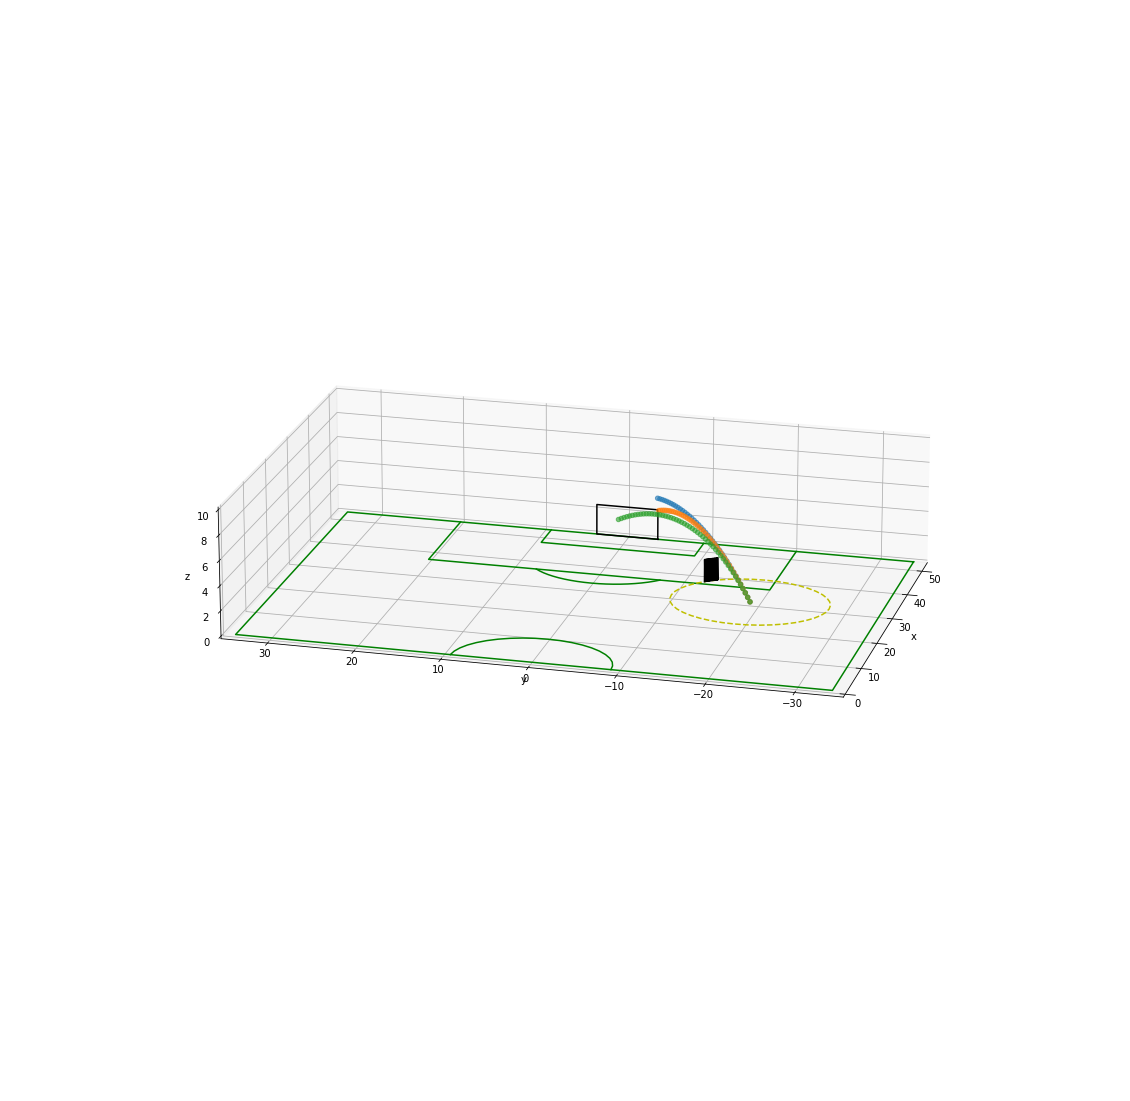

In [8]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

xlimit = 52.6

# Taken from: https://stackoverflow.com/questions/38149736/3d-plot-aspect-ratio-matplotlib
def make_get_proj(self, rx, ry, rz):
    '''
    Return a variation on :func:`~mpl_toolkit.mplot2d.axes3d.Axes3D.getproj` that
    makes the box aspect ratio equal to *rx:ry:rz*, using an axes object *self*.
    '''

    rm = max(rx, ry, rz)
    kx = rm / rx; ky = rm / ry; kz = rm / rz;

    # Copied directly from mpl_toolkit/mplot3d/axes3d.py. New or modified lines are
    # marked by ##
    def get_proj():
        relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

        xmin, xmax = self.get_xlim3d()
        ymin, ymax = self.get_ylim3d()
        zmin, zmax = self.get_zlim3d()

        # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0
        worldM = proj3d.world_transformation(xmin, xmax,
                                             ymin, ymax,
                                             zmin, zmax)

        # adjust the aspect ratio                          ##
        aspectM = proj3d.world_transformation(-kx + 1, kx, ##
                                              -ky + 1, ky, ##
                                              -kz + 1, kz) ##

        # look into the middle of the new coordinates
        R = np.array([0.5, 0.5, 0.5])

        xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
        yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
        zp = R[2] + np.sin(relev) * self.dist
        E = np.array((xp, yp, zp))

        self.eye = E
        self.vvec = R - E
        self.vvec = self.vvec / proj3d.mod(self.vvec)

        if abs(relev) > np.pi/2:
            # upside down
            V = np.array((0, 0, -1))
        else:
            V = np.array((0, 0, 1))
        zfront, zback = -self.dist, self.dist

        viewM = proj3d.view_transformation(E, R, V)
        perspM = proj3d.persp_transformation(zfront, zback)
        M0 = np.dot(viewM, np.dot(aspectM, worldM)) ##
        M = np.dot(perspM, M0)
        return M
    return get_proj


fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection="3d")

area = np.array([[52.5,-34,0],[52.5,34,0],[0,34,0],[0,-34,0],[52.5,-34,0]])
ax.plot3D(area[:,0],area[:,1],area[:,2], c='g')
arco = np.array([[52.5,-3.66,0],[52.5,3.66,0],[52.5,3.66,2.44],[52.5,-3.66,2.44],[52.5,-3.66,0]])
ax.plot3D(arco[:,0],arco[:,1],arco[:,2], c='k')
area1 = np.array([[52.5,-9.16,0],[47,-9.16,0],[47,9.16,0],[52.5,9.16,0]])
ax.plot3D(area1[:,0],area1[:,1],area1[:,2], c='g')
area2 = np.array([[52.5,-20.16,0],[36,-20.16,0],[36,20.16,0],[52.5,20.16,0]])
ax.plot3D(area2[:,0],area2[:,1],area2[:,2], c='g')
area3 = 9.15*np.array([
    np.cos(np.linspace(-np.pi/2,np.pi/2,21)),
    np.sin(np.linspace(-np.pi/2,np.pi/2,21)),
    0*np.linspace(-np.pi/2,np.pi/2,21)
]).T
ax.plot3D(area3[:,0],area3[:,1],area3[:,2], c='g')
area4 = 9.15*np.array([
    np.cos(np.linspace(np.pi-np.arccos(5.5/9.15),np.pi+np.arccos(5.5/9.15),21)),
    np.sin(np.linspace(np.pi-np.arccos(5.5/9.15),np.pi+np.arccos(5.5/9.15),21)),
    0*np.linspace(np.pi-np.arccos(5.5/9.15),np.pi+np.arccos(5.5/9.15),21)
]).T+np.array([41.5,0,0])
ax.plot3D(area4[:,0],area4[:,1],area4[:,2], c='g')

barrier_c = r_0+(9.15*np.array([
    np.cos(np.linspace(0,2*np.pi,41)),
    np.sin(np.linspace(0,2*np.pi,41)),
    0*np.linspace(0,2*np.pi/2,41)
]).T)
ax.plot3D(barrier_c[:,0],barrier_c[:,1],barrier_c[:,2], c='y',ls='--')
b1 = np.array([52.5,3.66,0])-r_0; b2 = np.array([52.5,-3.66,0])-r_0
# b1 = b1 / np.linalg.norm(b1); b2 = b2 / np.linalg.norm(b2)
# b1 = r_0+9.15*b1; b2 = r_0+9.15*b2;
b1 = np.arctan2(b1[1],b1[0]); b2 = np.arctan2(b2[1],b2[0])
barrier_m = r_0+(9.15*np.array([
    np.cos(np.linspace(b1,b2,21)),
    np.sin(np.linspace(b1,b2,21)),
    np.zeros(21)
]).T)
barrier = np.empty((2*barrier_m.shape[0],barrier_m.shape[1]), dtype=barrier_m.dtype)
barrier[0::2] = barrier_m
barrier[1::2] = barrier_m+np.array([0,0,1.8])
ax.plot3D(barrier[:,0],barrier[:,1],barrier[:,2], c='k')

skip_lines = min([np.sum(Xlist0[:,0]<xlimit),np.sum(Xlist1[:,0]<xlimit),np.sum(Xlist2[:,0]<xlimit)])//40

x0_ = Xlist0[:,0]
y0_ = Xlist0[:,1][x0_<xlimit]
z0_ = Xlist0[:,2][x0_<xlimit]
t0_ = Tlist[x0_<xlimit]
t0_star = Tlist[x0_>=52.5][0]
x0_ = x0_[x0_<xlimit]
ax.scatter3D(x0_[::skip_lines], y0_[::skip_lines], z0_[::skip_lines], cmap='hsv',alpha=0.6)

x1_ = Xlist1[:,0]
y1_ = Xlist1[:,1][x1_<xlimit]
z1_ = Xlist1[:,2][x1_<xlimit]
t1_ = Tlist[x1_<xlimit]
t1_star = Tlist[x1_>=52.5][0]
x1_ = x1_[x1_<xlimit]
ax.scatter3D(x1_[::skip_lines], y1_[::skip_lines], z1_[::skip_lines], cmap='hsv',alpha=0.6)

x2_ = Xlist2[:,0]
y2_ = Xlist2[:,1][x2_<xlimit]
z2_ = Xlist2[:,2][x2_<xlimit]
t2_ = Tlist[x2_<xlimit]
t2_star = Tlist[x2_>=52.5][0]
x2_ = x2_[x2_<xlimit]
ax.scatter3D(x2_[::skip_lines], y2_[::skip_lines], z2_[::skip_lines], cmap='hsv',alpha=0.6)


ax.set_xlabel('x')
ax.set_xlim3d((0,xlimit))
ax.set_ylabel('y')
ax.set_ylim3d((-34,34))
ax.set_zlabel('z')
ax.set_zlim3d((0,10))

ax.view_init(20,180+phi0*180/np.pi-20*np.sign(phi0))

ax.get_proj = make_get_proj(ax, xlimit, 68, 25)

fig.savefig('score_3D.png',dpi=300)

plt.show()

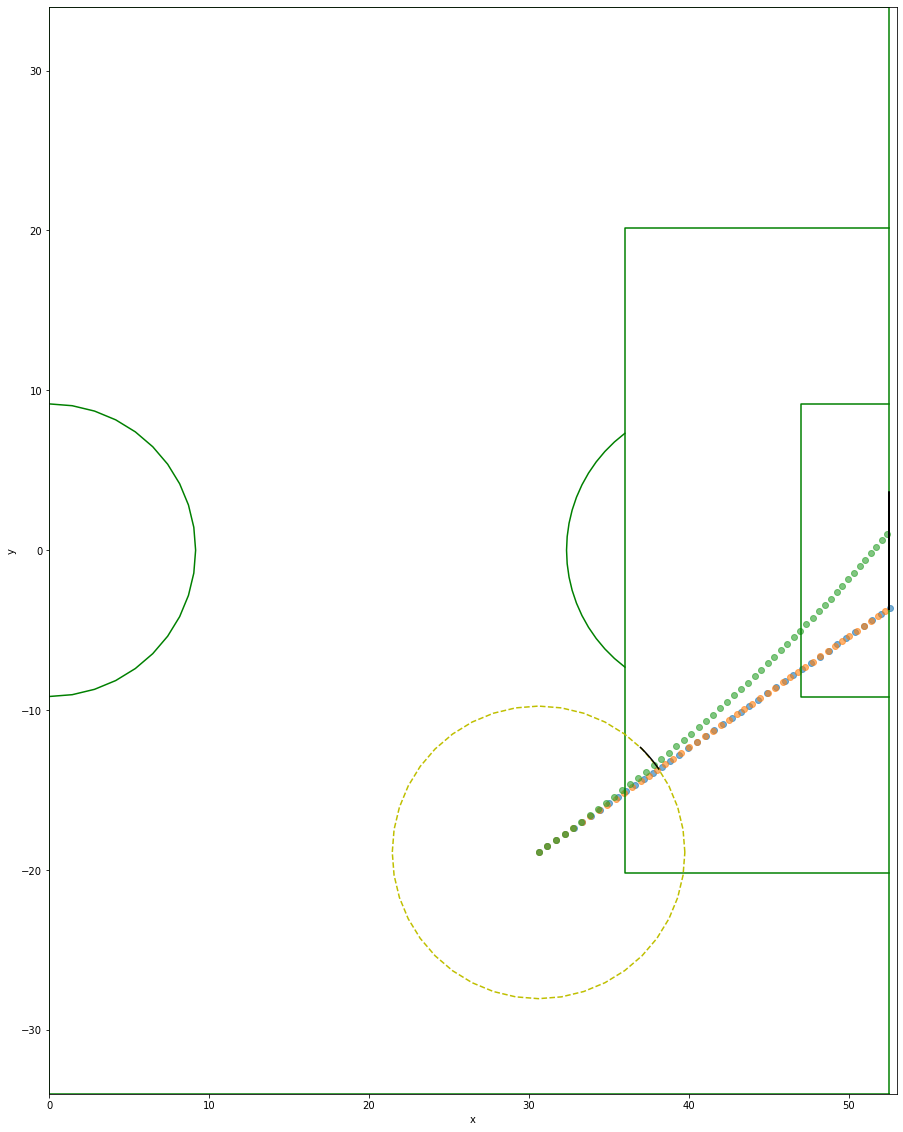

In [9]:
# 2D plot of x vs y, z vs x and z vs y
fig = plt.figure(figsize=(20*53/68,20))
ax = plt.axes()

ax.plot(area[:,0],area[:,1], c='g')
ax.plot(arco[:,0],arco[:,1], c='k')
ax.plot(area1[:,0],area1[:,1], c='g')
ax.plot(area2[:,0],area2[:,1], c='g')
ax.plot(area3[:,0],area3[:,1], c='g')
ax.plot(area4[:,0],area4[:,1], c='g')

ax.plot(barrier_c[:,0],barrier_c[:,1], c='y',ls='--')
ax.plot(barrier[:,0],barrier[:,1], c='k')

ax.scatter(x0_[::skip_lines], y0_[::skip_lines], cmap='hsv',alpha=0.6)
ax.scatter(x1_[::skip_lines], y1_[::skip_lines], cmap='hsv',alpha=0.6)
ax.scatter(x2_[::skip_lines], y2_[::skip_lines], cmap='hsv',alpha=0.6)


ax.set_xlabel('x')
ax.set_xlim((0,53))
ax.set_ylabel('y')
ax.set_ylim((-34,34))

ax.set_aspect(1)

fig.savefig('score_2D_xyz.png',dpi=300)

plt.show()

Altura antes y después de la barrera:
	Justo antes (0): 2.586567531275232
	Después     (0): 2.587040920633546
	Justo antes (1): 2.5479884658953016
	Después     (1): 2.548399651485973
	Justo antes (2): 2.5431852907355506
	Después     (2): 2.5435929644281323


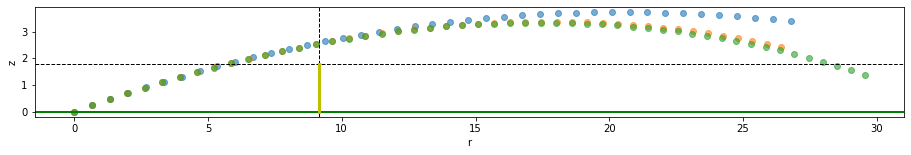

In [10]:
# 2D plot of z vs distance
fig = plt.figure(figsize=(20*53/68,20))
ax = plt.axes()

print('Altura antes y después de la barrera:')

r0_xy = np.linalg.norm(Xlist0[:len(x0_),[0,1]]-r_0[:2],axis=1)
ax.scatter(r0_xy[::skip_lines], z0_[::skip_lines], cmap='hsv',alpha=0.6)
print('\tJusto antes (0):',z0_[r0_xy<=9.15][-1])
print('\tDespués     (0):',z0_[r0_xy>9.15][0])

r1_xy = np.linalg.norm(Xlist1[:len(x1_),[0,1]]-r_0[:2],axis=1)
ax.scatter(r1_xy[::skip_lines], z1_[::skip_lines], cmap='hsv',alpha=0.6)
print('\tJusto antes (1):',z1_[r1_xy<=9.15][-1])
print('\tDespués     (1):',z1_[r1_xy>9.15][0])

r2_xy = np.linalg.norm(Xlist2[:len(x2_),[0,1]]-r_0[:2],axis=1)
ax.scatter(r2_xy[::skip_lines], z2_[::skip_lines], cmap='hsv',alpha=0.6)
print('\tJusto antes (2):',z2_[r2_xy<=9.15][-1])
print('\tDespués     (2):',z2_[r2_xy>9.15][0])

ax.axhline(0,lw=2,c='g')
ax.axhline(1.8,ls='--',lw=1,c='k')
ax.axvline(9.15,ls='--',lw=1,c='k')
ax.plot((9.15,9.15),(0,1.8),c='y',lw=3)

ax.set_xlabel('r')
ax.set_ylabel('z')

ax.set_aspect(1)

fig.savefig('score_2D_xyz.png',dpi=300)

plt.show()

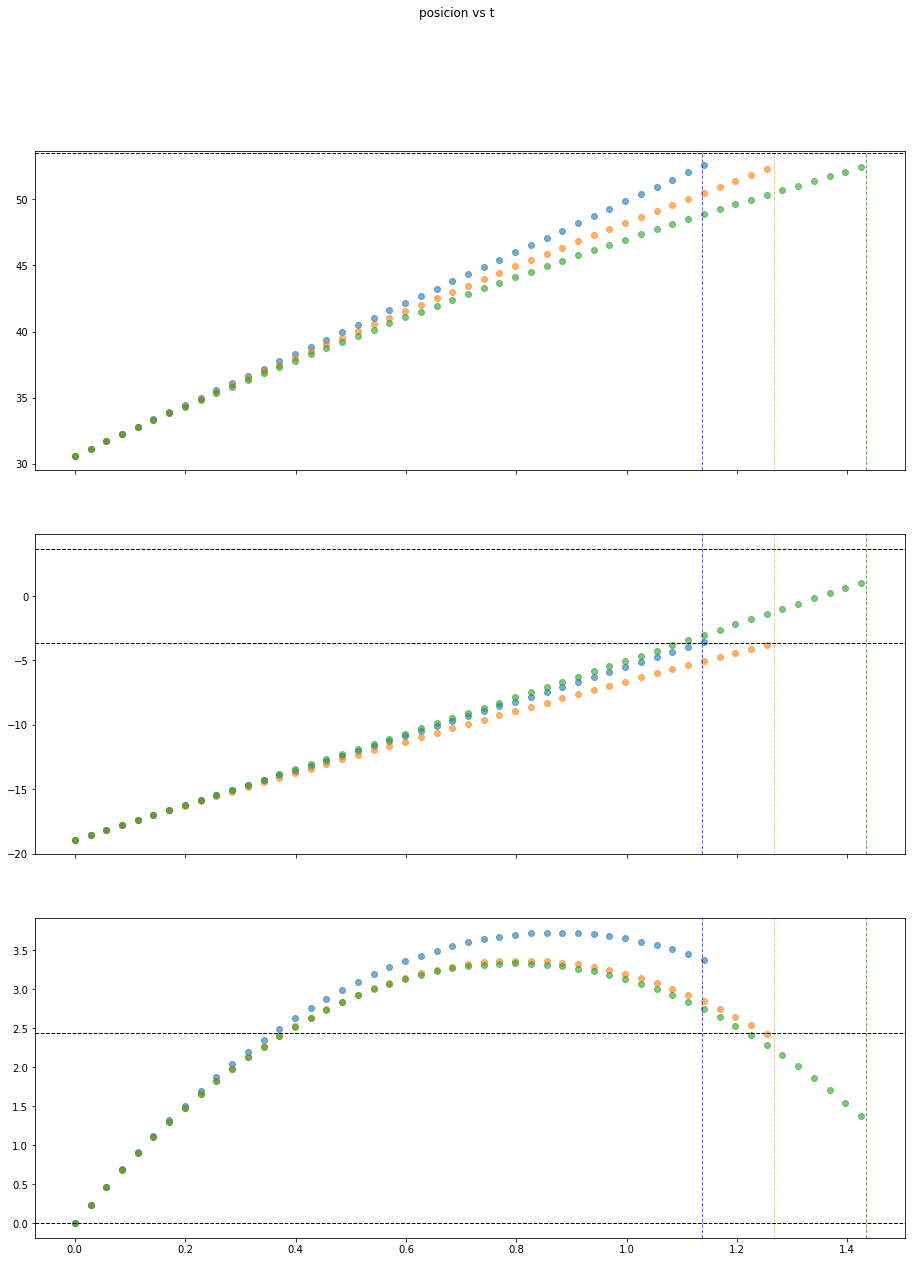

In [11]:
# 2D plot of x, y and z vs t
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(20*53/68,20), sharex=True)
fig.suptitle('posicion vs t')

ax1.scatter(t0_[::skip_lines],x0_[::skip_lines], cmap='hsv',alpha=0.6)
ax1.scatter(t1_[::skip_lines],x1_[::skip_lines], cmap='hsv',alpha=0.6)
ax1.scatter(t2_[::skip_lines],x2_[::skip_lines], cmap='hsv',alpha=0.6)
ax1.axhline(53.5,ls='--',lw=1,c='k')
ax1.axvline(t0_star,ls='--',lw=1,c='blue',alpha=0.6)
ax1.axvline(t1_star,ls='--',lw=1,c='orange',alpha=0.6)
ax1.axvline(t2_star,ls='--',lw=1,c='green',alpha=0.6)

ax2.scatter(t0_[::skip_lines],y0_[::skip_lines], cmap='hsv',alpha=0.6)
ax2.scatter(t1_[::skip_lines],y1_[::skip_lines], cmap='hsv',alpha=0.6)
ax2.scatter(t2_[::skip_lines],y2_[::skip_lines], cmap='hsv',alpha=0.6)
ax2.axhline(-3.66,ls='--',lw=1,c='k')
ax2.axhline(3.66,ls='--',lw=1,c='k')
ax2.axvline(t0_star,ls='--',lw=1,c='blue',alpha=0.6)
ax2.axvline(t1_star,ls='--',lw=1,c='orange',alpha=0.6)
ax2.axvline(t2_star,ls='--',lw=1,c='green',alpha=0.6)

ax3.scatter(t0_[::skip_lines],z0_[::skip_lines], cmap='hsv',alpha=0.6)
ax3.scatter(t1_[::skip_lines],z1_[::skip_lines], cmap='hsv',alpha=0.6)
ax3.scatter(t2_[::skip_lines],z2_[::skip_lines], cmap='hsv',alpha=0.6)
ax3.axhline(0,ls='--',lw=1,c='k')
ax3.axhline(2.44,ls='--',lw=1,c='k')
ax3.axvline(t0_star,ls='--',lw=1,c='blue',alpha=0.6)
ax3.axvline(t1_star,ls='--',lw=1,c='orange',alpha=0.6)
ax3.axvline(t2_star,ls='--',lw=1,c='green',alpha=0.6)


fig.savefig('score_2D_xyz-t.png',dpi=300)

plt.show()

# Tarea: Método de integración de Simpson (Problema 2)

Debe escribir una función que realice la integración usando el método Simpson para una división espacial no uniforme del dominio de integración. La que implementamos en clase era sólo para divisiones uniformes. Pista, pruebe que esta funciona para una división uniforme y luego resuelva el problema de integrar $f(x)=x^{-1/2}$ entre $(0,1]$ escogiendo una grilla no uniforme (más pequeña cerca del cero)

# Solución:
Recordemos que el método de Simpson es sencillamente calcular el área bajo "curva" discretizada asumiendo un ajuste cuadrático cada tripleta de puntos de una función $f(x)$ evaluada en un conjunto ordenado de puntos $\mathcal{X}=\{x_j\,\,|\,j\in\{0,1,\dots,N\}\,\wedge\,x_{j}<x_{j+1}\}$ definiendo el conjunto $\mathcal{f}=\{f_j\,\,|\,f_j=f(x_j)\,\,\forall\,x_j\in\mathcal{X}\}$. Debido a esa restricción, es necesario que el número de <u>intervalos</u> sea par o lo que es equivalente que el número de puntos sea impar. Con esta restricción, asumiendo que necesitamos tripletas de puntos e iniciando con índice en $0$ entonces partimos $N$ interalos en $N/2$ subintervalos caracterizados así:
$$\mathcal{I}_k=(x_{2k},x_{2k+2})\,\,\forall\,\,k\in{0,1,2,\dots,N/2-2,N/2-1}.$$
La unión de los sub-intervalos recubren la totalidad del área a evaluar con excepción de un número finito de puntos. Cada intervalo tiene dos puntos límite y un punto interior en los que la función existe. La aproximación es luego,
$$A_{\mathcal{I}_k}= \int_{x_{2k}}^{x_{2k+2}}f(x)\,\text{d}x\simeq\int_{x_{2k}}^{x_{2k+2}}P_2(x;\{x_{2k},f_{2k}\},\{x_{2k+1},f_{2k+1}\},\{x_{2k+2},f_{2k+2}\})\,\text{d}x,$$
con $P_2(x;\{x_{2k},f_{2k}\},\{x_{2k+1},f_{2k+1}\},\{x_{2k+2},f_{2k+2}\})$ el polinomio de grado 2 que pasa por los 3 puntos. Este polinomio se puede escribir convenientemente (simplificando notación usando variables alternas $a,b,c$ y $f_a,f_b,f_c$),
$$\begin{aligned}
%P_2(x;\{x_{2k},f_{2k}\},&\{x_{2k+1},f_{2k+1}\},\{x_{2k+2},f_{2k+2}\})=\\
%&f_{2k}\frac{(x-x_{2k+1})(x-x_{2k+2})}{(x_{2k}-x_{2k+1})(x_{2k}-x_{2k+2})}+\\
%&f_{2k+1}\frac{(x-x_{2k})(x-x_{2k+2})}{(x_{2k+1}-x_{2k})(x_{2k+1}-x_{2k+2})}+\\
%&f_{2k+2}\frac{(x-x_{2k})(x-x_{2k+1})}{(x_{2k+2}-x_{2k})(x_{2k+2}-x_{2k+1})}
P_2(x;\{a,f_a\},&\{b,f_b\},\{c,f_c\})=\\
&\frac{f_a}{(a-b)(a-c)}(x-b)(x-c)+\\
&\frac{f_b}{(b-a)(b-c)}(x-a)(x-c)+\\
&\frac{f_c}{(c-a)(c-b)}(x-a)(x-b)
\end{aligned}.$$
Integrando cada uno de los términos,
$$\begin{aligned}
%A_{\mathcal{I}_k}\simeq&\frac{f_a}{(a-b)(a-c)}\left.\left[\frac{(x-c)^2}{2}(x-b)-\frac{(x-c)^3}{6}\right]\right\vert_{a}^{c}\\
%&+\frac{f_b}{(b-a)(b-c)}\left.\left[\frac{(x-a)^2}{2}(x-c)-\frac{(x-a)^3}{6}\right]\right\vert_{a}^{c}\\
%&+\frac{f_c}{(c-a)(c-b)}\left.\left[\frac{(x-a)^2}{2}(x-b)-\frac{(x-a)^3}{6}\right]\right\vert_{a}^{c}\\
%A_{\mathcal{I}_k}\simeq&\frac{f_a}{(a-b)(a-c)}\left.(x-c)^2\left[\frac{x-b}{2}-\frac{x-c}{6}\right]\right\vert_{a}^{c}\\
%&+\frac{f_b}{(b-a)(b-c)}\left.(x-a)^2\left[\frac{x-c}{2}-\frac{x-a}{6}\right]\right\vert_{a}^{c}\\
%&+\frac{f_c}{(c-a)(c-b)}\left.(x-a)^2\left[\frac{x-b}{2}-\frac{x-a}{6}\right]\right\vert_{a}^{c}\\
%A_{\mathcal{I}_k}\simeq&\frac{f_a}{(b-a)(c-a)}(c-a)^2\left[\frac{b-a}{3}-\frac{c-b}{6}\right]\\
%&+\frac{f_b}{(b-a)(c-b)}\frac{(c-a)^3}{6}\\
%&+\frac{f_c}{(c-a)(c-b)}(c-a)^2\left[\frac{c-b}{3}-\frac{b-a}{6}\right]\\
A_{\mathcal{I}_k}\simeq&\frac{f_a}{6}(c-a)\left[2-\frac{c-b}{b-a}\right]\\
&+\frac{f_b}{6}(c-a)\left[1+\frac{b-a}{c-b}\right]\left[1+\frac{c-b}{b-a}\right]\\
&+\frac{f_c}{6}(c-a)\left[2-\frac{b-a}{c-b}\right]\\
\end{aligned},$$
obtenemos que, como es de esperarse, el área aproximada sólo depende de las longitudes y no de los valores mismos de $a,b,c$. Suponiendo que $l_1=b-a$ y $l_2=c-b$,
$$\begin{aligned}
A_{\mathcal{I}_k}\simeq&(\alpha f_a+\beta f_b+\gamma f_c)(l_1+l_2),\,\,\text{con,}\\
\alpha=&\frac{1}{6}\left[2-\frac{l_2}{l_1}\right]\\
\beta=&\frac{1}{6}\left[1+\frac{l_1}{l_2}\right]\left[1+\frac{l_2}{l_1}\right]\\
\gamma=&\frac{1}{6}\left[2-\frac{l_1}{l_2}\right]
\end{aligned}$$

In [12]:
import sys, traceback

def int_simpson(f,x,sort=False,wfunc=None):
    u1_6 = 1/6
    def A_jt(l1,l2,fa,fb,fc):
        alpha = (2-l2/l1)
        beta  = (1+l2/l1)*(1+l1/l2)
        gamma = (2-l1/l2)
        return u1_6*(l1+l2)*(alpha*fa+beta*fb+gamma*fc)
    A_jt = np.vectorize(A_jt)
    assert len(f)==len(x) and len(x)%2==1
    assert wfunc == None or callable(wfunc)
    N = len(x)-1
    X = x.copy()
    F = f.copy()
    # sort x and f if they are unsorted
    if sort:
        idx = np.argsort(X)
        X = X[idx]
        F = F[idx]
        del idx
    # If we were to multiply times a weight function:
    #   convenient for the calculation of Fourier coefficients
    if callable(wfunc):
        try:
            F = wfunc(X)
        except Exception as err1:
            print(traceback.format_exception_only(type(err1), err1))
            print("Function may not be vectorized, trying...")
            try:
                wfuncV = np.vectorize(wfunc)
                F = wfuncV(X)
            except Exception as err2:
                print(traceback.format_exception_only(type(err2), err2))
                print("Function cannot be evaluated, disregarding step...")
                pass
            pass
    # computing interval lengths
    l = np.diff(X)
    l1 = l[:-1:2]; l2 = l[1::2]
    del l
    # computing function values at "a,b,c"
    f_a = F[:-2:2]
    f_b = F[1:-1:2]
    f_c = F[2::2]
    return np.sum(A_jt(l1,l2,f_a,f_b,f_c))

In [13]:
# Testing (uniform intervals) with the integral of a line with slope 0, y = 1 between 0 and 2
# Answer: 2
N = 10**2
x = np.linspace(0,2,N+1)
f = 1*np.ones(N+1)
exp_val = 2
try:
    assert int_simpson(f,x)==exp_val,"Failed test"
    print("Passed test")
except AssertionError:
    print("The integral is A=%.20lf and should be %.2f."%(int_simpson(f,x),exp_val))

Passed test


In [14]:
# Testing (non-uniform intervals) with the integral of a line with slope 0, y = 1 between 0 and 2
# Answer: 2
N = 10**2
x_ = np.cumsum(np.random.uniform(size=N))
x = np.concatenate(([0],0+(2-0)*x_/x_[-1]))
f = 1*np.ones(N+1)
exp_val = 2
try:
    assert int_simpson(f,x)==exp_val,"Failed test"
    print("Passed test")
except AssertionError:
    print("The integral is A=%.20lf and should be %.2f."%(int_simpson(f,x),exp_val))

Passed test


In [15]:
# Testing (uniform intervals) with the integral of a line with slope 1/2 and intercept y = 1 between 1 and 3
# Answer: 4
N = 10**2
x = np.linspace(1,3,N+1)
f = x/2+1
exp_val = 4
try:
    assert int_simpson(f,x)==exp_val,"Failed test"
    print("Passed test")
except AssertionError:
    print("The integral is A=%.20lf and should be %.2f."%(int_simpson(f,x),exp_val))

Passed test


In [16]:
# Testing (non-uniform intervals) with the integral of a line with slope 1/2 and intercept y = 1 between 1 and 3
# Answer: 4
N = 10**2
x_ = np.cumsum(np.random.uniform(size=N))
x = np.concatenate(([1],1+(3-1)*x_/x_[-1]))
f = x/2+1
exp_val = 4
try:
    assert int_simpson(f,x)==exp_val,"Failed test"
    print("Passed test")
except AssertionError:
    print("The integral is A=%.20lf and should be %.2f."%(int_simpson(f,x),exp_val))

The integral is A=3.99999999999999955591 and should be 4.00.


In [17]:
# Testing (uniform intervals) with the integral of 1/sqrt(x) between 0 and 1
# Answer: 2
N = 10**6
x = np.linspace(1e-8,1,N+1)
f = 1/np.sqrt(x)
exp_val = 2
try:
    assert int_simpson(f,x)==exp_val,"Failed test"
    print("Passed test")
except AssertionError:
    print("The integral is A=%.20lf and should be %.2f."%(int_simpson(f,x),exp_val))

The integral is A=2.00206033525754278912 and should be 2.00.


In [18]:
# Testing (non-uniform random intervals) with the integral of 1/sqrt(x) between 0 and 1
# Answer: 2
N = 10**4
x_ = 1/(np.flip(np.cumsum(np.random.uniform(size=N+1))))
x = x_/x_[-1]
f = 1/np.sqrt(x)
exp_val = 2
try:
    assert int_simpson(f,x)==exp_val,"Failed test"
    print("Passed test")
except AssertionError:
    print("The integral is A=%.20lf and should be %.2f."%(int_simpson(f,x),exp_val))

The integral is A=1.99544022661390973994 and should be 2.00.


In [19]:
# Testing (non-uniform selected intervals) with the integral of 1/sqrt(x) between 0 and 1
# Answer: 2
N = 10**2 # Notice the good approximatino with only 100 points
m = 4 # Vary this parameter to get better or worse performance
x_ = 1/(np.flip(np.arange(0,N+1)+1+m))**3 # Vary the exponent to get better results too
x = x_/x_[-1]
f = 1/np.sqrt(x)
exp_val = 2
try:
    assert int_simpson(f,x)==exp_val,"Failed test"
    print("Passed test")
except AssertionError:
    print("The integral is A=%.20lf and should be %.2f."%(int_simpson(f,x),exp_val))

The integral is A=1.97250008741722049344 and should be 2.00.
